Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [3]:
movies_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [4]:
# Code here
# Remove all columns between column name 'keywords' to 'overview'
movies_df.drop(movies_df.loc[:, 'keywords':'overview'].columns, axis=1, inplace = True)
# Remove all columns between column name 'status' to 'tagline'
movies_df.drop(movies_df.loc[:, 'status':'tagline'].columns, axis=1, inplace = True)
# Remove homepage column
movies_df.drop(['homepage'], axis=1, inplace = True)
# Remove production_companies column
movies_df.drop(['production_companies'], axis=1)
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')

#### Remove any duplicate rows

In [5]:
# Code here
# Select duplicate rows of all columns
df_duplicates = movies_df[movies_df.duplicated()]
print(df_duplicates)

# remove duplicate rows based on all columns
movies_df.drop_duplicates(inplace=True)


Empty DataFrame
Columns: [budget, genres, id, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, title, vote_average, vote_count]
Index: []


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# Code here 
#replace all the missing values with nan and then drop them
movies_df.replace(0, np.nan, inplace=True)
movies_df = movies_df.dropna()
movies_df.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466.0
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106.0
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124.0


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [7]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], infer_datetime_format=True)
movies_df['release_date'].head()

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.strftime('%Y')
movies_df['release_year'] = np.asarray(movies_df['release_year'], dtype='float64')
movies_df['release_year'].head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4    2012.0
Name: release_year, dtype: float64

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [8]:
# Code here
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['revenue'] = movies_df['revenue'].astype('int64')

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [9]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [10]:
# Inspect flattened data
movies_df.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800.0,2009.0
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500.0,2007.0
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466.0,2015.0
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106.0,2012.0
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124.0,2012.0


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [11]:
# Create a dataframe with all the movies in the "Action" genre
# Format the data in the genres columns.
# Make sure there are no spaces and the strings are separeted correctly.
movies_df['genres']=movies_df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_df['genres']=movies_df['genres'].str.split(',')

# Extract action movies 
action_movies = movies_df.loc[(movies_df['genres'].str[0] == 'Action')]

action_movies.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800.0,2009.0
2,245000000,"[Action, Adventure, Crime]",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466.0,2015.0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106.0,2012.0
4,260000000,"[Action, Adventure, ScienceFiction]",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124.0,2012.0
7,280000000,"[Action, Adventure, ScienceFiction]",99861,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767.0,2015.0


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [12]:
# Code here
expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
cheapest_movies_df = movies_df.sort_values(by ='budget', ascending=True).head()

<AxesSubplot:xlabel='budget', ylabel='title'>

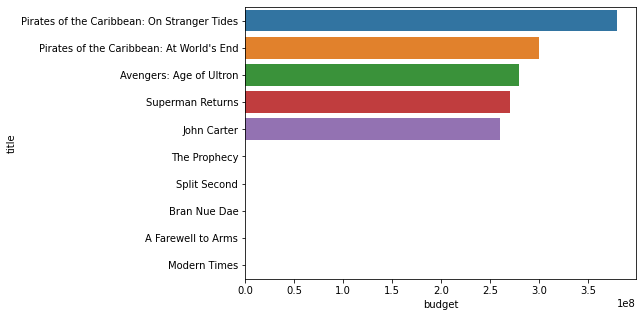

In [13]:
# create a new dataframe with the top five most expensive and top five cheapest movies.
new_frame = [expensive_movies_df, cheapest_movies_df]
expensive_cheapest = pd.concat(new_frame)

# sort the movies in decending order by budgets
expensive_cheapest.sort_values(by='budget', axis=0, ascending=False, inplace=True)
plt.figure(figsize=(7,5))
sns.barplot(data=expensive_cheapest, y='title', x='budget')

# Top 5 most expensive movies

    1.Pirates of the Caribbean: On Stranger Tides
    2.Pirates of the Caribbean:At World's End
    3.Avengers: Age of Uitron
    4.Superman Returns
    5.John Carter


<AxesSubplot:xlabel='budget'>

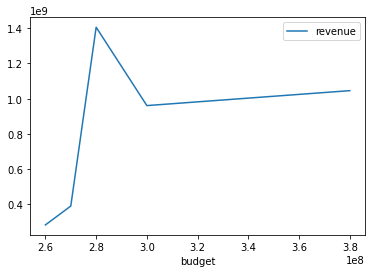

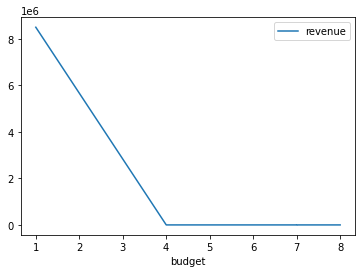

In [14]:
# compare the budget and revenue of both the cheapest and most expensive movies
expensive_movies_df.plot(x="budget", y="revenue")
cheapest_movies_df.plot(x="budget", y="revenue")

The most expensive movies have a high revenue and the cheapest ones have a lot revenue.

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

<AxesSubplot:xlabel='profit', ylabel='title'>

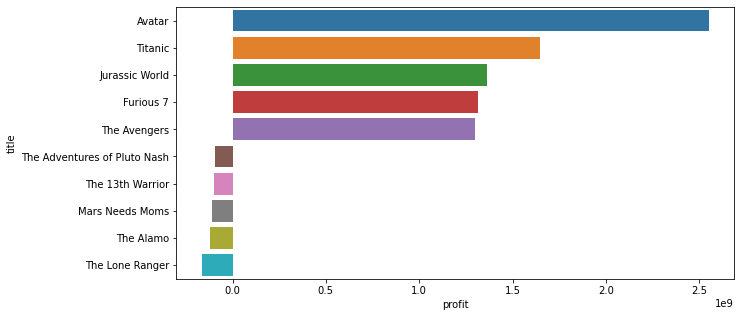

In [15]:
# calculate profit for every movie
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# movies wiht the highest profits
highest_profits_df = movies_df.sort_values(by ='profit', ascending=False).head()

# moveis with the lowest profits
lowest_profits_df = movies_df.sort_values(by ='profit', ascending=True).head()

new_frame2 = [highest_profits_df, lowest_profits_df]
highest_lowest_profits = pd.concat(new_frame2)

highest_lowest_profits.sort_values(by='profit', axis=0, ascending=False, inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(data=highest_lowest_profits, y='title', x='profit')


# Top 5 most profitable movies

    1. Avatar
    2. Titanic
    3. Jurassic World
    4. Furious 7
    5. The Avengers


# Top 5 least profitable movies
1. The Adventures of Pluto Nash
2. The 13th Warrior
3. Mars Needs Moms
4. The Alamo
5. the Lone Ranger

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

<AxesSubplot:xlabel='popularity', ylabel='title'>

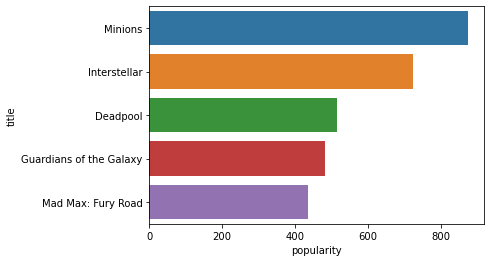

In [16]:
# Code here
popular_movies_df = movies_df.sort_values(by ='popularity', ascending=False).head()

sns.barplot(data=popular_movies_df, y='title', x='popularity')

#### Find Movies which are rated above 7

In [17]:
# Code here

movies_df[movies_df['vote_average'] >= 7.0]


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800.0,2009.0,2550965087
3,250000000,"[Action, Crime, Drama, Thriller]",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106.0,2012.0,834939099
6,260000000,"[Animation, Family]",38757,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330.0,2010.0,331794936
7,280000000,"[Action, Adventure, ScienceFiction]",99861,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767.0,2015.0,1125403694
8,250000000,"[Adventure, Fantasy, Family]",767,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293.0,2009.0,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,"[Documentary, History]",1779,3.284903,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",['United States of America'],1989-09-01,6706368,91.0,['English'],Roger & Me,7.4,90.0,1989.0,6546368
4724,10000,"[Drama, Fantasy, Horror, ScienceFiction]",985,20.399578,"[{""name"": ""American Film Institute (AFI)"", ""id...",['United States of America'],1977-03-19,7000000,89.0,['English'],Eraserhead,7.5,485.0,1977.0,6990000
4738,60000,"[Mystery, Drama, Thriller]",473,27.788067,"[{""name"": ""Truth and Soul Pictures Inc"", ""id"":...",['United States of America'],1998-07-10,3221152,84.0,['English'],Pi,7.1,586.0,1998.0,3161152
4773,27000,[Comedy],2292,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755.0,1994.0,3124130


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

In [18]:
# Collecting a list of genres
genre_list=[]
for i in movies_df['genres']:
    genre_list.extend(i)


In [19]:
# Get a frequency of movies in each genre
genre_count = pd.Series(genre_list).value_counts()[:10].sort_values(ascending=True)
genre_count

Fantasy            342
Family             365
ScienceFiction     431
Crime              520
Romance            574
Adventure          661
Action             918
Thriller           935
Comedy            1110
Drama             1439
dtype: int64

<AxesSubplot:>

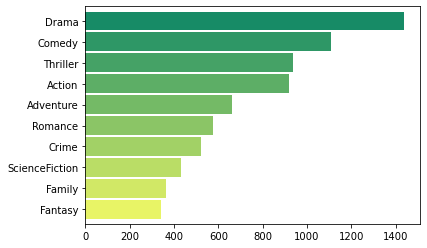

In [20]:
ax = genre_count.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

ax

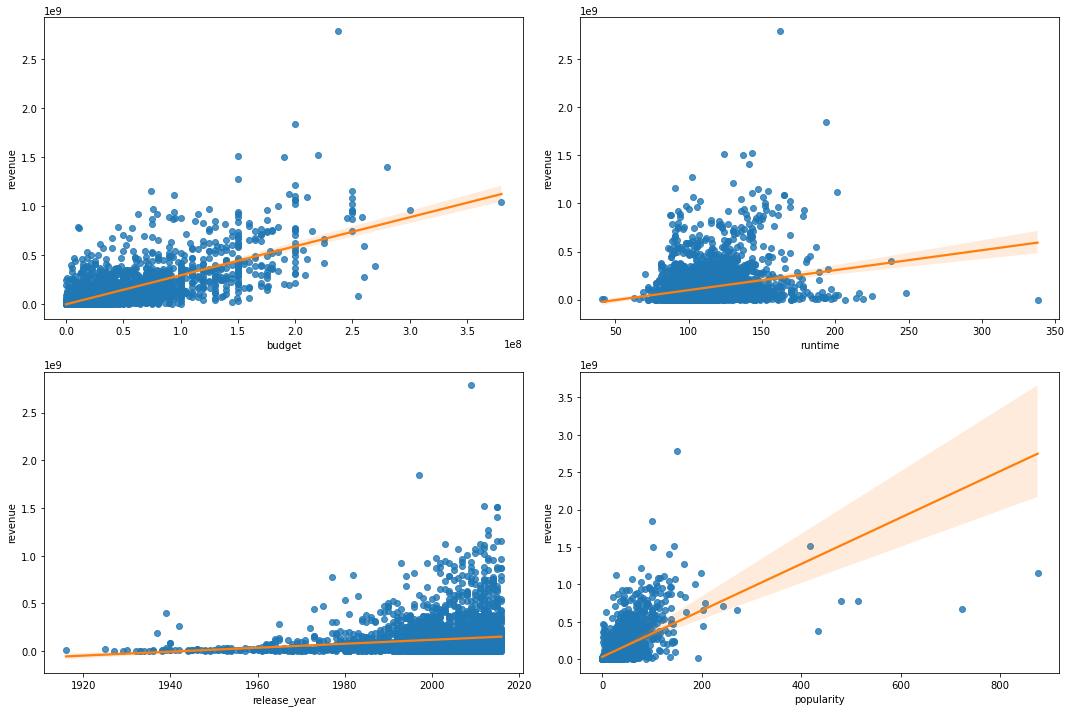

In [21]:
# Generate three different interesting visualisations with a data story.

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
p_color = dict(color="C0")
l_color = dict(color="C1")
sns.regplot(data=movies_df, x="budget", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[0][0])
sns.regplot(data=movies_df, x="runtime", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[0][1])
sns.regplot(data=movies_df, x="release_year", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[1][0])
sns.regplot(data=movies_df, x="popularity", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[1][1])
fig.tight_layout()




The first graph show that a the movies budget and revenue have a correlation. The venue of a movies grows with the growth in budget.

The second graph shows a slower positive correlation between the movies revenue and runtime. The longer the run time of a movie, the higher the revenue.

The third graph shows a very low correlation between the release date of a movie and its revenue. The latest movies do not necessarily generate a higher revenue compared to the old ones.

The forth graph shwos a strong positive correlation between the popularity of a movie and its revenue. The high the movie's popularity score, the higher the revenue.